In [1]:
import numpy as np
import pylab as plt
from scipy.special import jv
%matplotlib inline

Basado en el criterio de resolución
$$\Delta x = \theta f = 1.22 \frac{\lambda}{D} f$$

La intensidad del campo se describe como una función proporcional a una Bessel

In [85]:
# parámetros físicos
f = 0.5 # focal lente (m)
D = 0.02 # diámetro apertura lente (m)
wl = 532.0e-9 # longitud de onda (m)
pix = 1.0e-6 # tamaño pixel detector (m)
#pixN = 10 # número de pixeles observados
#ang = 0.0005*np.pi/180 #ángulo (rad)
ang = wl/D # ángulo en términos del parámetro lambda/diámetro (rad)
levels = 256 # resolución detector (bit)
Respix = 20 # muestreo de cada pixel

dx = ang*f # Separación espacial en el plano del dectector (m)
print('Separación de spots = %.2f um' %(dx*1e6))
pixN = int(3*dx/pix) # número de pixeles observados; se modifica para que se vean los dos spots

Separación de spots = 13.30 um


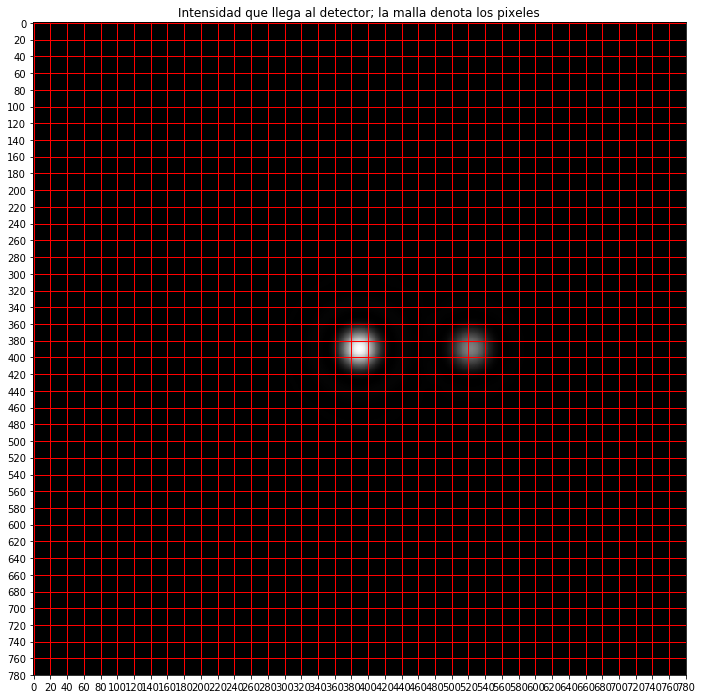

In [ ]:
N = Respix*pixN # Tamaño matriz simulación spots reales
x = np.linspace(-pixN*pix,pixN*pix,N) # espacio x-coord
X,Y = np.meshgrid(x,x) # espacio coordenado 2D
R = np.sqrt(X**2 + Y**2) # coordenada radial
Star = (0.25*D**2/R**2)*jv(1,2*np.pi*D*R/(0.5*wl*f))**2 # Patron estrella, sobre el eje
R = np.sqrt((X-dx)**2 + Y**2) # coordenada radial desplazada para planeta
planet = (0.25*D**2/R**2)*jv(1,2*np.pi*D*R/(0.5*wl*f))**2 # patrón planeta fuera del eje
Plano = Star + 0.5*planet # Intensidad en el plano detector; planeta con intensidad máxima menor a la estrella

# Simulación de visualización con detector segun resolución pixeles y resolución rango dinámico
Detector = np.zeros((pixN,pixN))
for ii in range(pixN):
    for jj in range(pixN):
        Aux = np.sum(Plano[ii*Respix:(ii+1)*Respix,jj*Respix:(jj+1)*Respix])
        Detector[ii,jj] = Aux
DetBit = np.ceil(levels*Detector/np.max(Detector))


fig = plt.figure(figsize=(12,12))
plt.title('Intensidad que llega al detector; la malla denota los pixeles')
ax = fig.gca()
ax.set_xticks(np.linspace(0, N, pixN+1))
ax.set_yticks(np.linspace(0, N, pixN+1))
plt.imshow(Plano,cmap='gray')
plt.grid(color='red',lw=1)
plt.show()


plt.figure(figsize=(12,12))
plt.title('Simulación de como se observaría en el detector')
plt.xticks(np.linspace(0, pixN, pixN+1))
plt.yticks(np.linspace(0, pixN, pixN+1))
plt.imshow(DetBit,cmap='gray')
#plt.colorbar()
plt.show()